## 读取并分析模型预测的结果

In [1]:
import os
import datetime
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt

"""
保存结果路径
"""
# filename = r"test_results\20220722-19-04-00_test-alphanetV1-simple-wukong\test_results.npz"
# AlphanetV1 simple
# filename = r"D:/syx-working/quant/220721code/test_results/20220722-19-04-00_test-alphanetV1-simple-wukong/test_results.npz"
# AlphaNetV1 multifactor
# filename = r"D:/syx-working/quant/220721code/test_results/20220722-16-51-37_test-AlphanetV1-multifactor-wukong/test_results.npz"
# ALphanet V2 multi
# filename = r"D:/syx-working/quant/220724code-alphanetv2/test_results/20220725-20-22-35_Alphanetv2-multifactor-20ep/test_results.npz"
# alphanet v2 mod
# filename = r"D:/syx-working/quant/220726code-alphanetmod/test_results/20220728-23-06-48_Alphanetv2-b2000/test_results.npz"
# AlphaNet V3 multi
# filename = r"D:/syx-working/quant/220725code-v3train/test_results/20220726-12-07-33_Alphanetv3-multiple-20ep/test_results.npz"
# Alphanet V3 mod
# filename = r"D:/syx-working/quant/220727code-alphanetv3mod/test_results/20220728-10-12-34_Alphanetv3GRUmod25ep/test_results.npz"
# Factor net 
# filename = r"C:/Users/csjunxu/Documents/syx-working/220728factornet-4encoder/test_results/20220729-20-23-11_FactorNet-4encoder/test_results.npz"


#### 220815 results
# FactorNet 4 encoder
# filename = "C:/Users/csjunxu/Documents/syx-working/220812codeTrain/test_results/20220814-00-11-17_FactorNet-4encoder-25epoch/test_results.npz"
# filename = r"C:/Users/csjunxu/Documents/syx-working/220818trainNewData/test_results/20220907-17-02-41_FactorNet-CombineSmallOntop-50epoch/test_results.npz"

#### 220913 id16 results
# filename = "/home/ubuntu/syx/quant/220911exp/test_results/20220913-15-58-52_FactorNet-ID16-LargerLevelLearnable-125epoch/test_results.npz"

#### 220916 30--30pred


## 60 -- 30 pred
# filename = "/home/ubuntu/syx/quant/220913newInterval/test_results/20220915-14-41-38_FactorNet-ID23-LargerLevelLearnable-60train30pred-100epoch/test_results.npz"

## 60 -- 10 pred
# filename = "/home/ubuntu/syx/quant/220913newInterval/test_results/20220915-14-41-40_FactorNet-ID22-LargerLevelLearnable-60train10pred-75epoch/test_results.npz"


filename = "/home/ubuntu/syx/quant/220913newInterval/test_results/20220917-17-59-48_FactorNet-ID20-LargerLevelLearnable-30train7pred-100epoch/test_results.npz"


print(filename)

predictions = np.load(filename, allow_pickle=True)
stock_names = predictions['stock_names']
results = predictions['results']

/home/ubuntu/syx/quant/220913newInterval/test_results/20220917-17-59-48_FactorNet-ID20-LargerLevelLearnable-30train7pred-100epoch/test_results.npz


In [2]:
split_ratio = [4, 1]
train_split, test_split = split_ratio
train_split = train_split / sum(split_ratio)
test_split = test_split / sum(split_ratio)

res_index = 0
stock_name = stock_names[res_index]
df_date = pd.to_datetime(results[res_index]['df_date'])
predicts = results[res_index]['predict']
gt_return10 = results[res_index]['gt_return10']

print(res_index)
print(stock_name)

0
300606.SZ


### 计算预测结果和到期收益率的相关系数

预测效果评估：
* Corr (Pearson-Corr)
* RankIC (Spearman-Corr)
* R2
* RMSE
* MAE
* UpDownPrediction


In [3]:
from utils.metrics import evaluate_predicts


"""
修改后的测试代码可以在这里研究结果的问题特征。
"""
threshold = 0.0
# threshold = 0.005
test_results, mean_results = evaluate_predicts(predictions, threshold)

df_trainres = pd.DataFrame(data=test_results['train'])
df_testres = pd.DataFrame(data=test_results['test'])

# corr_res_train = test_results['train']['Corr']
# R2_res_train = test_results['train']['R2']
# rmse_res_train = test_results['train']['RMSE']
# mae_res_train = test_results['train']['MAE']
# updown_acc_train = test_results['train']['UpDownAcc']

# corr_res_test = test_results['test']['Corr']
# R2_res_test = test_results['test']['R2']
# rmse_res_test = test_results['test']['RMSE']
# mae_res_test = test_results['test']['MAE']
# updown_acc_test = test_results['test']['UpDownAcc']

Evaluate with threshold 0.0
----Train Part----
Total sample:  4567
Average Corr:  0.9113751913006478
Average RankIC:  0.8896300768776411
Average R2:  -89960.55582311636
Average RMSE:  0.9211698
Average MAE:  0.05860662
Average Up and Down prediction accuracy:  0.856894672752297
----Test Part----
Total sample:  4567
Average Corr:  0.47222887648521783
Average RankIC 0.46101150577534267
Average R2:  -84333.42422111731
Average RMSE:  0.6545547
Average MAE:  0.08381546
Average Up and Down prediction accuracy:  0.6708662904657882


In [4]:
df_testres = df_testres.dropna()
print(f"Total length : {len(df_testres)}")
df_testres.mean()

Total length : 4567


/home/ubuntu/anaconda3/envs/yx-py3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until


Corr             0.472229
RankIC           0.461012
R2          -84333.424221
RMSE             0.654556
MAE              0.083815
UpDownAcc        0.670866
dtype: float64

### 移除上边测试结果中的异常值

In [ ]:
## 查看哪些是异常值
naloc = df_testres['Corr'].isna()
subNAdata = df_testres[naloc]

In [7]:
## 移除异常值
df_testsub = df_testres[~naloc]
# df_testres
len(df_testsub)
df_testsub.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4541 entries, 0 to 4553
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   stock_names  4541 non-null   object 
 1   Corr         4541 non-null   float64
 2   RankIC       4541 non-null   float64
 3   R2           4541 non-null   float64
 4   RMSE         4541 non-null   float32
 5   MAE          4541 non-null   float32
 6   UpDownAcc    4541 non-null   float64
dtypes: float32(2), float64(4), object(1)
memory usage: 248.3+ KB


### 按日期进行筛选

In [2]:
"""
原始数据的存储位置
"""
data_file = '../quant-data/status_data_all.csv'



df_dataall = pd.read_csv(data_file, encoding='gbk')

stock_names  = df_dataall['s_info_windcode']
stocknames = stock_names.drop_duplicates()
print("Start date and End date:")
print(df_dataall['trade_dt'].min(), df_dataall['trade_dt'].max())

stocknames.shape

Start date and End date:
20100104 20220217


(4802,)

In [3]:
import utils.metrics as metrics
# start_date = datetime.datetime.strptime("20190101", "%Y%m%d").date()
# end_date = datetime.datetime.strptime("20200101", "%Y%m%d").date()
start_date = "20200101"
end_date = "20210101"
print(start_date)
print(end_date)

"我怎么这么混了啊，哎"
"求别挂求别挂"
"求老师别gua人啊，千万别挂啊啊啊"
"对不起老师，我太菜了，还犹豫不决无动于衷，对不起老师，但是我求您让我过吧。。。"
"真的，求别挂，生活太难了"

20200101
20210101


'真的，求别挂，生活太难了'

#### 可视化某个区间的结果


978
603768.SH
1115
Subinterval length:  243
Corr : 0.9383543670584261
RankIC : 0.9085648670844895
R2 : 0.8802422732114792
RMSE : 0.030924074351787567
MAE : 0.023700540885329247
UpDownAcc : 0.8189300411522634


Text(0, 0.5, '10 days return rate')

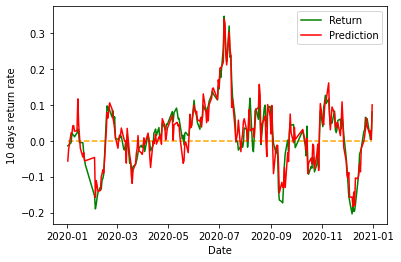

In [8]:
res_index = 978
stock_name = stock_names[res_index]
df_date = results[res_index]['df_date']
df_date = pd.Series(df_date)
df_date = pd.to_datetime(df_date.apply(str))
predicts = results[res_index]['predict']
gt_return10 = results[res_index]['gt_return10']

print(res_index)
print(stock_name)
print(len(df_date))

sub_loc = (df_date >= start_date) & (df_date < end_date)

sub_date = df_date[sub_loc]
sub_pred = predicts[sub_loc]
sub_gt = gt_return10[sub_loc]

print("Subinterval length: ", len(sub_date))

eval_results = metrics.evaluate_single(sub_pred, sub_gt, 0.005)
for key in eval_results.keys():
	print(f"{key} : {eval_results[key]}")

### plot 
plt.hlines(0, xmin=sub_date.iloc[0], xmax=sub_date.iloc[-1], colors="orange", linestyles="dashed")
p1, = plt.plot(sub_date, sub_gt, color='green', label="sub_gt")
p2, = plt.plot(sub_date, sub_pred, color='red', label="sub_pred")
# plt.legend([None, 'Real Return', 'Prediction'])
plt.legend([p1, p2], ['Return', 'Prediction'])
plt.xlabel("Date")
plt.ylabel("10 days return rate")

#### 测试所有的在这个区间的结果

In [6]:
### test on date interval
df_results = metrics.evaluate_prediction_withdate(predictions, start_date=start_date, end_date=end_date, updownthreshold=0.005)
print(f"Test start from {start_date} and end to {end_date}")

df_results.mean(axis=0, skipna=True)

Omit the 000024.SZ for it has no values.
Omit the 000033.SZ for it has no values.


d:\ProgramData\Miniconda3\lib\site-packages\numpy\lib\function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
d:\ProgramData\Miniconda3\lib\site-packages\numpy\lib\function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
d:\ProgramData\Miniconda3\lib\site-packages\numpy\lib\function_base.py:2542: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\csjunxu\Documents\syx-working\220907analyzeResults\utils\metrics.py:12: RuntimeWarning: divide by zero encountered in float_scalars
  R2 = 1 - np.sum(residualsq) / np.sum(totalsq)


Omit the 000511.SZ for it has no values.
Omit the 000522.SZ for it has no values.
Omit the 000527.SZ for it has no values.
Omit the 000562.SZ for it has no values.
Omit the 000578.SZ for it has no values.
Omit the 000594.SZ for it has no values.
Omit the 000602.SZ for it has no values.
Omit the 000748.SZ for it has no values.
Omit the 000916.SZ for it has no values.
Omit the 000979.SZ for it has no values.
Omit the 001201.SZ for it has no values.
Omit the 001202.SZ for it has no values.
Omit the 001203.SZ for it has no values.
Omit the 001205.SZ for it has no values.
Omit the 001206.SZ for it has no values.
Omit the 001207.SZ for it has no values.
Omit the 001208.SZ for it has no values.
Omit the 001209.SZ for it has no values.
Omit the 001210.SZ for it has no values.
Omit the 001211.SZ for it has no values.
Omit the 001212.SZ for it has no values.
Omit the 001213.SZ for it has no values.
Omit the 001215.SZ for it has no values.
Omit the 001217.SZ for it has no values.
Omit the 002962.

d:\ProgramData\Miniconda3\lib\site-packages\numpy\lib\function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
d:\ProgramData\Miniconda3\lib\site-packages\numpy\lib\function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
d:\ProgramData\Miniconda3\lib\site-packages\numpy\lib\function_base.py:2542: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\csjunxu\Documents\syx-working\220907analyzeResults\utils\metrics.py:12: RuntimeWarning: divide by zero encountered in float_scalars
  R2 = 1 - np.sum(residualsq) / np.sum(totalsq)



Omit the 688160.SH for it has no values.
Omit the 688161.SH for it has no values.
Omit the 688165.SH for it has no values.
Omit the 688166.SH for it has no values.
Omit the 688169.SH for it has no values.
Omit the 688177.SH for it has no values.
Omit the 688178.SH for it has no values.
Omit the 688179.SH for it has no values.
Omit the 688180.SH for it has no values.
Omit the 688181.SH for it has no values.
Omit the 688183.SH for it has no values.
Omit the 688185.SH for it has no values.
Omit the 688186.SH for it has no values.
Omit the 688187.SH for it has no values.
Omit the 688189.SH for it has no values.
Omit the 688191.SH for it has no values.
Omit the 688195.SH for it has no values.
Omit the 688196.SH for it has no values.
Omit the 688198.SH for it has no values.
Omit the 688199.SH for it has no values.
Omit the 688200.SH for it has no values.
Omit the 688201.SH for it has no values.
Omit the 688202.SH for it has no values.
Omit the 688208.SH for it has no values.
Omit the 688215

C:\Users\csjunxu\AppData\Local\Temp\ipykernel_13504\1302067394.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_results.mean(axis=0, skipna=True)


Corr           0.690812
RankIC         0.673656
R2                 -inf
RMSE           0.064911
MAE            0.047310
UpDownAcc      0.684007
Days         236.838762
dtype: float64

C:\Users\csjunxu\AppData\Local\Temp\ipykernel_7584\638857853.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_results.mean(axis=0, skipna=True)


Corr         0.690812
RankIC       0.673656
R2               -inf
RMSE         0.064911
MAE          0.047310
UpDownAcc    0.684007
dtype: float64

探索存在的问题

0.3398357687702234


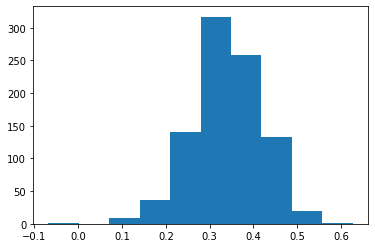

In [15]:
plt.hist(corr_res)
print(np.mean(corr_res))

## 筛选结果中SH50的代码

In [ ]:
import shutil
import os

import numpy as np
import pandas as pd

sh50_file = "/home/ubuntu/syx/quant/quant-data/sh50code.txt"

data_folder = "/home/ubuntu/syx/quant/stockdata/wukong-220821"
out_folder = "/home/ubuntu/syx/quant/stockdata/sh50-20210721"

names = pd.read_table(sh50_file, header=None)

names = names[0]
# names = names.apply(str).apply(str.split)
names = names.tolist()

## 切分sh50code
namelist = []
idlist = []
for each in names:
	paired = each.split()
	namelist.append(paired[0])
	idlist.append(paired[1][1:-1])

In [ ]:
filter_predictions = []
for i, name in enumerate(stock_names):
	if name[:6] in idlist:
		filter_predictions.append()

## 其他随便写写


In [ ]:
import numpy as np
import pandas as pd